<div dir="rtl" style="text-align: right; border: 1px solid #ccc; padding: 15px; background-color: #f0f0f0; border-radius: 8px;">

###  שאלה המחקר:

</div>

<div dir="rtl">
האם טיפול פסיכולוגי פועל באותה מידה על כולם?
</div>

<div dir="rtl">
או שמא גורמים כמו גיל, תזונה והרקע המשפחתי מעצבים את הדרך שבה אנחנו חווים חרדה – ואת הדרך בה אנחנו מתמודדים איתה?
</div>

<div dir="rtl">
כיצד גורמים חיצוניים כמו גיל, איכות תזונה והיסטוריה משפחתית של חרדה משפיעים על רמות החרדה בקרב אנשים הפונים לטיפול פסיכולוגי בלבד?
</div>

In [4]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #for reshaping graph size
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px

df = pd.read_csv("enhanced_anxiety_dataset.csv")

<div dir="rtl">

### נבחן תחילה, כמה אנשים מהמדגם פונים לפסיכולוג?

</div>

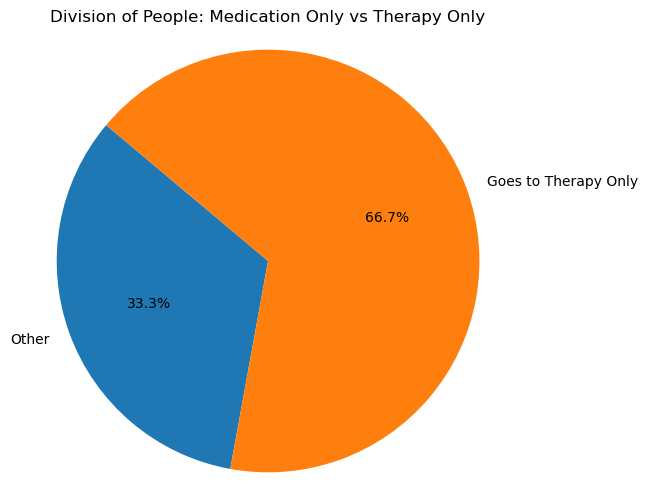

In [6]:
# Filter two exclusive groups
therapy_only = df[(df['Medication'] == 'No') & (df['Therapy Sessions (per month)'] > 0)]

# Re-defining therapy_only_participants since it's not currently defined
therapy_only_participants = df[(df['Medication'] == 'No') & (df['Therapy Sessions (per month)'] > 0)].copy()

# First graph: people who do not go to therapy at all, split by medication status
no_therapy_participants = df[df['Therapy Sessions (per month)'] == 0].copy()

# Prepare data
labels = ['Other', 'Goes to Therapy Only']
sizes = [len(no_therapy_participants), len(therapy_only)]

# Plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Division of People: Therapy ')
plt.axis('equal')
plt.show()


<div dir="rtl">
מהנתונים עולה כי כ-66%, שני שליש מהנבדקים פונים לטיפול פסיכולוגי מתוך המדגם.

</div>



<div dir="rtl">
כעת נבחן את הקשר בין רמת החרדה לאותם אנשים אשר מטופלים אצל פסיכולוג
</div>


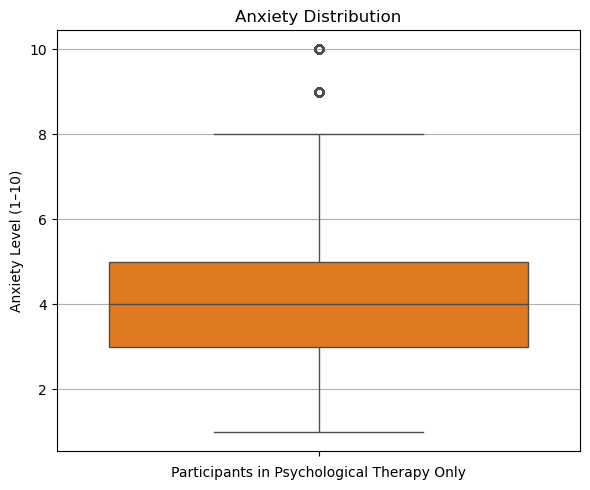

In [9]:

plt.figure(figsize=(6, 5))
sns.boxplot(
    data=therapy_only_participants,
    y="Anxiety Level (1-10)",
    color="#FF7800"  # brighter vivid orange like in the pie chart
)
plt.xlabel("Participants in Psychological Therapy Only")
plt.ylabel("Anxiety Level (1–10)")
plt.title("Anxiety Distribution", fontsize=12)
plt.grid(True, axis="y")
plt.tight_layout()
plt.show()


<div dir="rtl">
רמות החרדה בקרב מטופלים הפונים לטיפול פסיכולוגי בלבד מציגות פיזור רחב ונוכחות ערכים קיצוניים, כפי שניתן לראות מהאורך של התיבה והקווים ומהנקודות החריגות בגרף — מה שמעיד על שונות גבוהה בתגובת המטופלים.
</div>




<div dir="rtl">
השונות בתגובת המטופלים לטיפול עשויה להיות קשורה גם לתדירות המפגשים.
נבדוק זאת כאן -
</div>


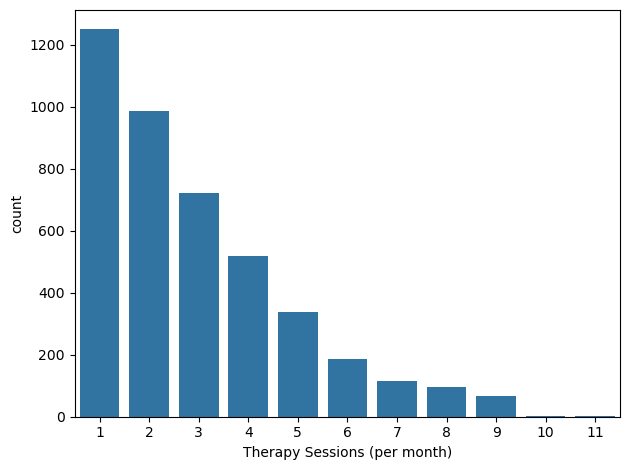

In [12]:
sns.countplot(data=therapy_only_participants,
              x='Therapy Sessions (per month)')
plt.tight_layout()
plt.show()

<div dir="rtl">
ההתפלגות מצביעה על כך שרוב המטופלים פונים לטיפול בתדירות של אחת עד שלוש פגישות בחודש, בעוד שקבוצות נוספות בוחרות בתדירויות גבוהות יותר – מה שמעיד על
שונות בעומק ובאינטנסיביות של התהליך הטיפולי
</div>


<div dir="rtl">
וכעת נבחן כיצד באות לידי ביטוי רמות החרדה בקרב מטופלים שמגיעים לטיפול פסיכולוגי בקצבים שונים?
</div>

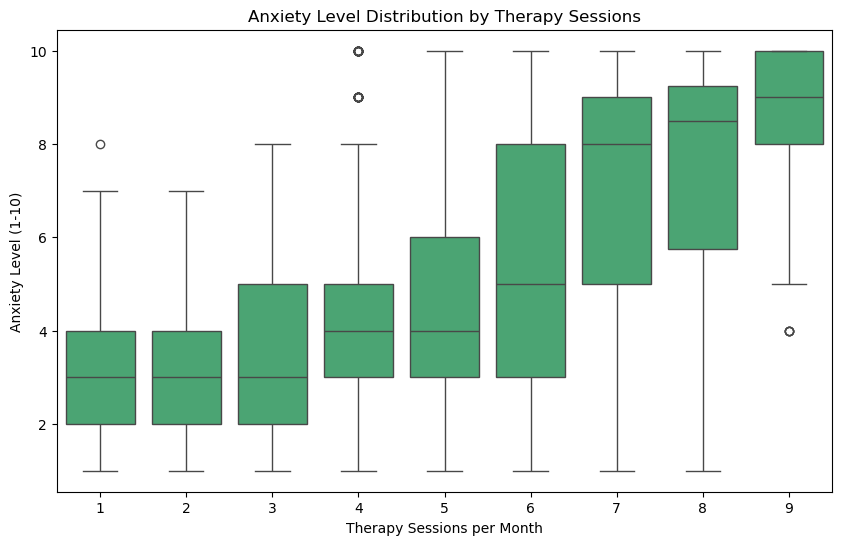

In [15]:
# Filter only people who go to therapy and do not take medication
therapy_no_med = df[(df['Therapy Sessions (per month)'] > 0) & (df['Medication'] == 'No')]

# Remove people who attend 10+ therapy sessions (even if few exist)
therapy_no_med = therapy_no_med[therapy_no_med['Therapy Sessions (per month)'] < 10]
# Make a safe copy
therapy_no_med = therapy_no_med.copy()


# Plot anxiety distribution by therapy sessions (no medication only)
plt.figure(figsize=(10, 6))
sns.boxplot(data=therapy_no_med,
            x='Therapy Sessions (per month)',
            y='Anxiety Level (1-10)',
            color='mediumseagreen')
plt.title('Anxiety Level Distribution by Therapy Sessions')
plt.xlabel('Therapy Sessions per Month')
plt.ylabel('Anxiety Level (1-10)')
plt.show()


<div dir="rtl">

### תובנה ראשונה:

</div>

<div dir="rtl">
ניתן לראות שקיים קשר בין תדירות גבוהה לבין כמות טיפולים פסיכולוגיים הולכת ועולה
</div>


<div dir="rtl">
לאחר שראינו כי קיימת התאמה בין רמות חרדה גבוהות לבין תדירות גבוהה יותר של טיפול פסיכולוגי, נבקש כעת לבחון כיצד מאפיינים חיצוניים נוספים באים לידי ביטוי בהקשר של רמות החרדה בקרב מטופלים אלה.
</div>


<div dir="rtl">
    
## כיצד מתפלגים הגילאים בקבוצה זו?
    
</div>


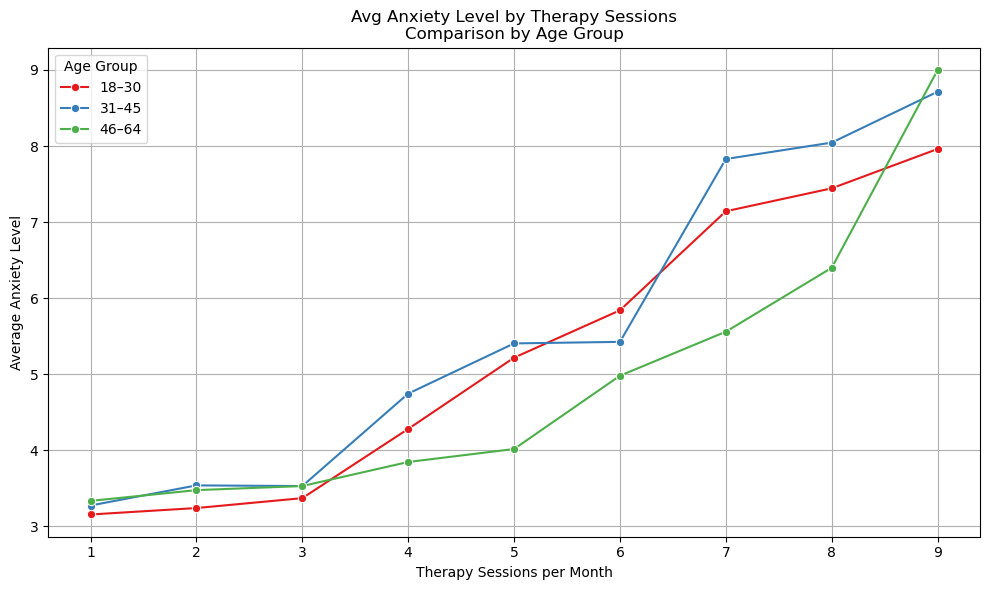

In [19]:
# Define age bins (18–64 only)
age_bins = [17, 30, 45, 65]
age_labels = ['18–30', '31–45', '46–64']
therapy_no_med['Age Group'] = pd.cut(therapy_no_med['Age'], bins=age_bins, labels=age_labels)

# Group by Therapy Sessions and Age Group to calculate mean anxiety
grouped = therapy_no_med.groupby(['Therapy Sessions (per month)', 'Age Group'], observed=False)['Anxiety Level (1-10)'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(
    data=grouped,
    x='Therapy Sessions (per month)',
    y='Anxiety Level (1-10)',
    hue='Age Group',
    marker='o',
    palette='Set1',
    err_style='band',  # shaded error bands
)
plt.title('Avg Anxiety Level by Therapy Sessions\nComparison by Age Group')
plt.xlabel('Therapy Sessions per Month')
plt.ylabel('Average Anxiety Level')
plt.legend(title='Age Group')
plt.grid(True)
plt.tight_layout()
plt.show()


<div dir="rtl">

### וכאן אנו מעמיקים את התבונה הראשונה שלנו:

</div>


<div dir="rtl" style="text-align: right; border: 1px solid #ddd; padding: 15px; background-color: #f9f9f9; border-radius: 8px;"> 
<strong>בקבוצת הגיל **46–64**, קצב עליית רמות החרדה עם העלייה בתדירות המפגשים הטיפוליים היה איטי יותר בהשוואה לקבוצות גיל צעירות יותר.</strong><br>
הסבר אפשרי לכך טמון בכך שעם הגיל מצטברות גם **מיומנויות טבעיות לוויסות רגשי** – בין אם מתוך ניסיון חיים, התמודדות עם מצבי לחץ לאורך השנים, או הסתגלות למצבים משתנים. ייתכן שבני קבוצת גיל זו מגיעים לטיפול עם יכולות התמודדות בסיסיות שמפחיתות את עוצמת התגובה הטיפולית הראשונית.

</div>



<div dir="rtl">
לצד הגורמים החיצוניים, נרצה לבחון גם את השפעתם של הגורמים פסיכולוגיים על רמות החרדה בקרב המטופלים.
</div>
<div dir="rtl">
נמצאה השפעה מעניינת בקרב אלו אשר דיווחו על היסטוריה משפחתית של חרדה

</div>


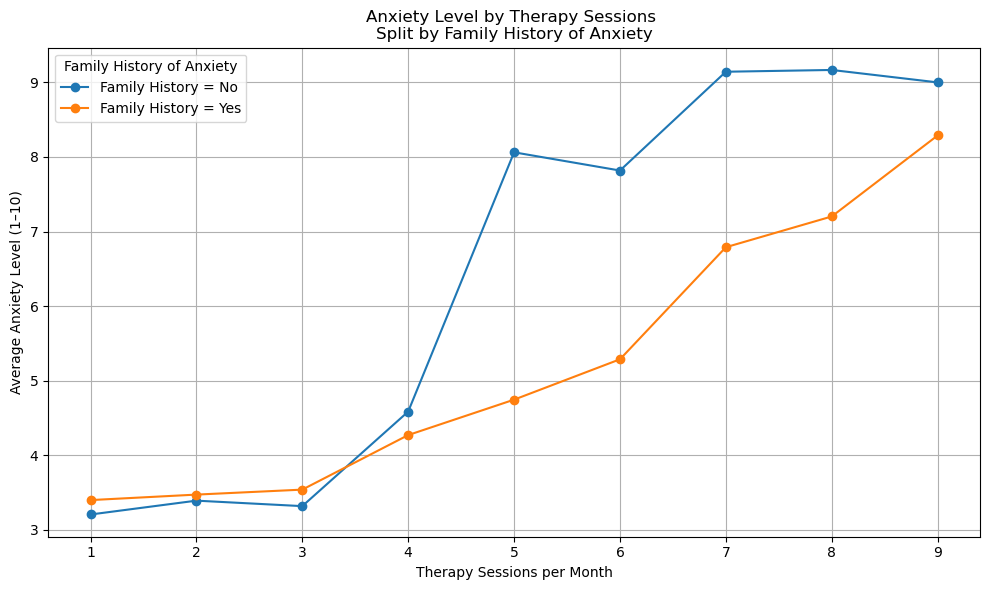

In [22]:
grouped = therapy_no_med.groupby(
    ['Therapy Sessions (per month)', 'Family History of Anxiety']
)['Anxiety Level (1-10)'].mean().reset_index()

pivoted = grouped.pivot(
    index='Therapy Sessions (per month)',
    columns='Family History of Anxiety',
    values='Anxiety Level (1-10)'
)

plt.figure(figsize=(10, 6))
for col in pivoted.columns:
    plt.plot(pivoted.index, pivoted[col], marker='o', label=f'Family History = {col}')

plt.title('Anxiety Level by Therapy Sessions \nSplit by Family History of Anxiety')
plt.xlabel('Therapy Sessions per Month')
plt.ylabel('Average Anxiety Level (1–10)')
plt.legend(title='Family History of Anxiety')
plt.grid(True)
plt.tight_layout()
plt.show()

<div dir="rtl">

### וכאן ניתן לראות מימד נוסף, פסיכולוגי, שעלול לתרום להבנה עמוקה יותר של טיפול זה

</div>


<div dir="rtl" style="text-align: right; border: 1px solid #ddd; padding: 15px; background-color: #f9f9f9; border-radius: 8px;">
<strong>היסטורית חרדה במשפחה - מכשיר הסתגלות?</strong><br>
מטופלים ללא היסטורית חרדה במשפחה עלולים להיות פחות מודעים למושגים של ויסות רגשי ולהגיב בחרדה מוגברת.<br>
לכן, חשוב להעניק להם הכנה מותאמת וליווי רגשי הדוק בתחילת הדרך.
</div>


<div dir="rtl">
לאחר שבחנו כיצד רמות החרדה משתנות לפי גיל והיסטוריה משפחתית, 
</div>
<div dir="rtl">
נרצה כעת לבדוק האם גם הרגלים בריאותיים משפיעים על רמות החרדה בקרב מטופלים בטיפול פסיכולוגי

</div>

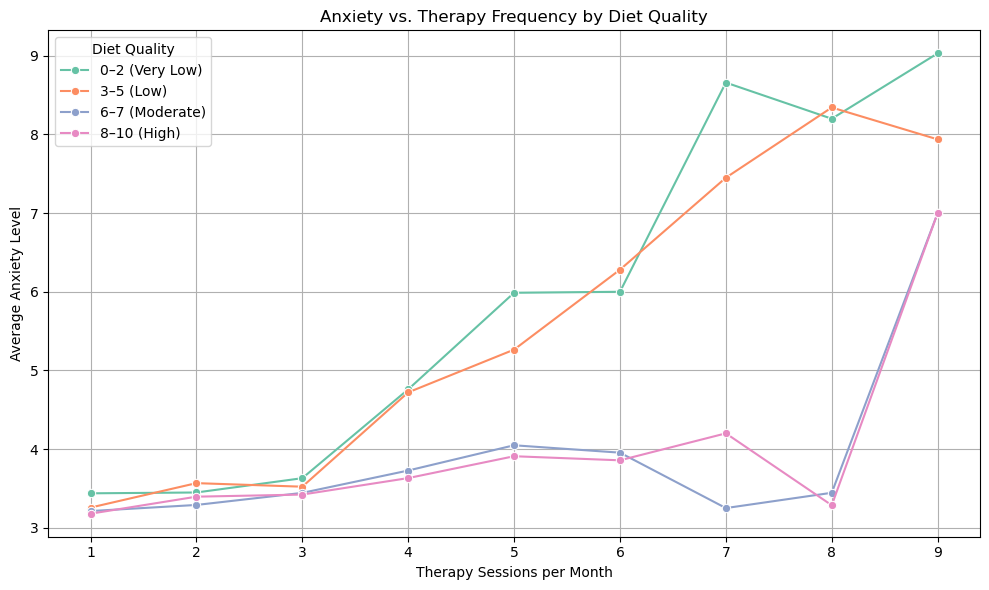

In [25]:

therapy_only_participants["diet_quality_category"] = pd.cut(
    therapy_only_participants["Diet Quality (1-10)"],
    bins=[0, 3, 6, 8, 11],
    labels=["0–2 (Very Low)", "3–5 (Low)", "6–7 (Moderate)", "8–10 (High)"],
    right=False
)

line_data = therapy_only_participants.groupby(
    ["Therapy Sessions (per month)", "diet_quality_category"],
    observed=False
)["Anxiety Level (1-10)"].mean().reset_index()

line_data_filtered = line_data[line_data["Therapy Sessions (per month)"] <= 9]


plt.figure(figsize=(10, 6))
sns.lineplot(
    data=line_data_filtered,
    x="Therapy Sessions (per month)",
    y="Anxiety Level (1-10)",
    hue="diet_quality_category",
    palette="Set2",
    marker="o"
)

plt.xlabel("Therapy Sessions per Month")
plt.ylabel("Average Anxiety Level")
plt.title("Anxiety vs. Therapy Frequency by Diet Quality")
plt.legend(title="Diet Quality")
plt.grid(True)
plt.tight_layout()
plt.show()


<div dir="rtl">

### ושכבה נוספת: 

</div>

<div dir="rtl" style="text-align: right; border: 1px solid #ddd; padding: 15px; background-color: #f9f9f9; border-radius: 8px;">
הגרף מצביע על כך שמטופלים בעלי תזונה איכותית (8–10) שומרים על רמות חרדה נמוכות יחסית גם ככל שתדירות המפגשים עולה, בעוד שאצל מטופלים בעלי תזונה ירודה (0–2) ניכרת עלייה ברמות החרדה ככל שהתדירות גוברת. ממצא זה מחזק את ההבנה שאיכות התזונה עשויה להיות קשורה לרמות חרדה נמוכות יותר בקרב מטופלים בטיפול פסיכולוגי, במיוחד בתדירויות טיפול גבוהות.
</div>


<div dir="rtl">

### אז לאחר ניתוח מגוון גורמים חיצוניים ופסיכולוגיים בקרב מטופלים בטיפול פסיכולוגי, ניתן לזהות מספר תובנות מרכזיות שמשקפות כיצד משתנים אלו מתקשרים לרמות החרדה🔍🧑‍⚕️: 

</div>

<div dir="rtl" style="text-align: right; border: 1px solid #ddd; padding: 15px; background-color: #f9f9f9; border-radius: 8px;">
<div dir="rtl">
• הגיל אכן משפיע! מצאנו שקבוצת המטופלים בגילאי 46–64 שמרה על יציבות יחסית ברמות החרדה גם עם עלייה בתדירות הטיפול.
</div>
    
<div dir="rtl">
• מטופלים ללא היסטוריה משפחתית של חרדה הראו עלייה חדה יותר ברמות החרדה לאורך זמן — ייתכן בשל חוסר בוויסות רגשי.
</div>

<div dir="rtl">
• בתחום אורח החיים, נמצא קשר ברור בין תזונה איכותית לבין רמות חרדה נמוכות — עם פער ממוצע של עד 5 נקודות בין קבוצות הקצה.
</div>

<div dir="rtl">
לסיכום,  
הנתונים מצביעים על מה שהשיח הטיפולי יודע כבר מזמן: לא מדובר רק בחרדה, אלא במי שחווה אותה. גיל, תזונה, והיסטוריה רגשית – כולם מצטרפים לתמונה שמסבירה לא רק כמה חרדה יש, אלא למה היא מתבטאת כפי שהיא. טיפול פסיכולוגי אפקטיבי אינו רק תגובה לתסמין, אלא מענה להקשר שבו הוא נוצר.
</div>
</div>
